## **License Plate Recognition (Vietnam Geography)**

https://www.kaggle.com/datasets/duydieunguyen/licenseplates/data

The license plate zoning dataset in Vietnam is divided into 2 classes, 1-line number plates (LpD: 0) and 2-line number plates (LpV: 1).


In [2]:
import os

from ultralytics  import YOLO
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

### **Data Visualization**

Dieu_0001.png
(451, 600, 3)


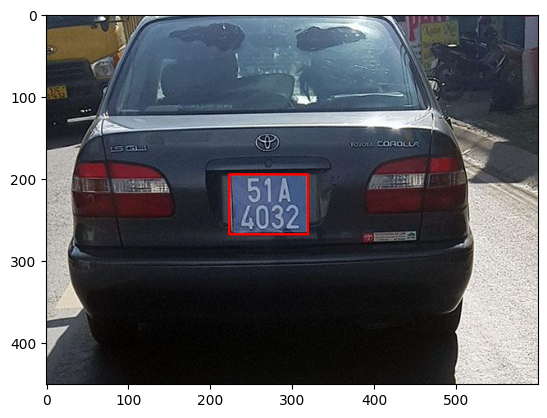

Dieu_0002.png
(450, 600, 3)


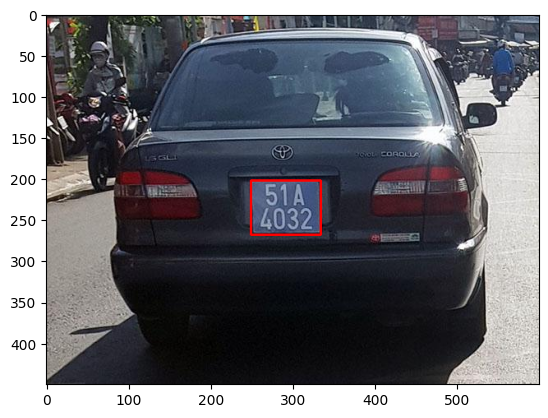

Dieu_0004.png
(450, 600, 3)


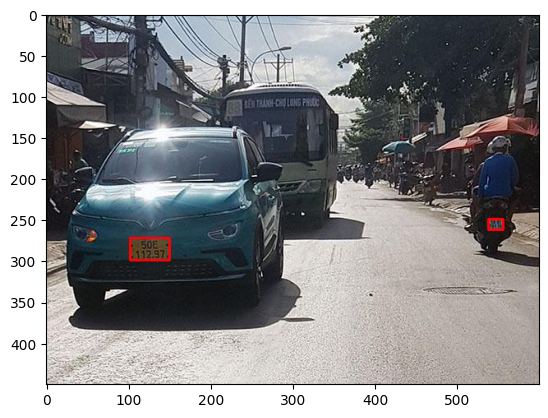

Dieu_0006.png
(600, 450, 3)


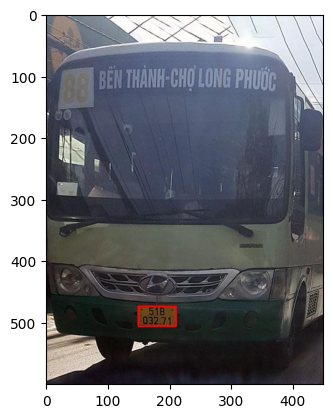

Dieu_0007.png
(600, 449, 3)


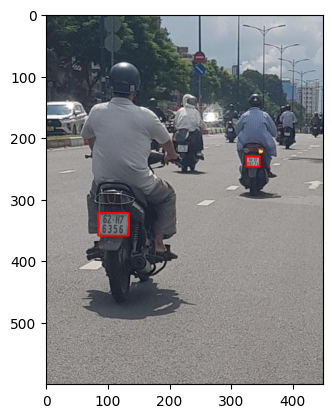

In [5]:
dataset_path = './vn_license_plates/images'
train_path = os.path.join(dataset_path, 'train')
test_path = os.path.join(dataset_path, 'val')
label_path = './vn_license_plates/labels'

train_imgs = [img for img in sorted(os.listdir(train_path)) if img.endswith('.png')]
test_imgs = [img for img in sorted(os.listdir(test_path)) if img.endswith('.png')]
train_labels = []
for img_file in train_imgs:
    label_file = img_file.replace('.png', '.txt')
    label_path_file = os.path.join(label_path, 'train', label_file)
    
    if os.path.exists(label_path_file):
        with open(label_path_file, 'r') as f:
            coords = []
            for line in f.readlines():
                if line.strip():  # Skip empty lines
                    values = [float(x) for x in line.strip().split()]
                    coords.append(values)
            train_labels.append(coords)
    else:
        train_labels.append([])  # Empty list if no label file exists


for (idx, file) in enumerate(train_imgs[:5]):
    print(file)
    img = cv2.imread(os.path.join(train_path, file))
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    # Get image dimensions
    h, w = img.shape[:2]
    print(img.shape)
    
    # Get coordinates for this image
    coords = train_labels[idx]
    
    if coords:
        for coord in coords:
            class_id = int(coord[0])
            x0 = int(min(coord[1], coord[3], coord[5], coord[7]) * w)
            y0 = int(min(coord[2], coord[4], coord[6], coord[8]) * h)
            x1 = int(max(coord[1], coord[3], coord[5], coord[7]) * w)
            y1 = int(max(coord[2], coord[4], coord[6], coord[8]) * h)
            
            # Draw rectangle
            cv2.rectangle(img, (x0, y0), (x1, y1), (255, 0, 0), 2)
    plt.imshow(img)
    plt.show()

## **Training**

In [ ]:
# model = YOLO("./model/yolov8m.pt")
# model.info()

# model.train(
#     data="./vn_license_plates/dataset.yaml",
#     epochs=30,
#     imgsz=640,
#     batch=16,
#     name="yolov8m_lp_recognition",
#     device='0,1,2,3',
#     patience=20
# )

YOLOv8m summary: 169 layers, 25,902,640 parameters, 0 gradients, 79.3 GFLOPs
Ultralytics 8.3.105 🚀 Python-3.9.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:1 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:2 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:3 (NVIDIA GeForce RTX 3090, 24253MiB)
engine/trainer: task=detect, mode=train, model=./model/yolov8m.pt, data=./vn_license_plates/dataset.yaml, epochs=30, time=None, patience=100, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=0,1,2,3, workers=8, project=None, name=yolov8m_lp_recognition, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ra

train: Scanning /hdd/tu/projects/lp_recognition/vn_license_plates/labels/train.cache... 3433 images, 0 backgrounds, 0 corrupt: 100%|██████████| 3433/3433 [00:00<?, ?it/s]
val: Scanning /hdd/tu/projects/lp_recognition/vn_license_plates/labels/val.cache... 1145 images, 0 backgrounds, 0 corrupt: 100%|██████████| 1145/1145 [00:00<?, ?it/s]


Plotting labels to runs/detect/yolov8m_lp_recognition/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 77 weight(decay=0.0), 84 weight(decay=0.0005), 83 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 32 dataloader workers
Logging results to runs/detect/yolov8m_lp_recognition
Starting training for 30 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/30      2.11G     0.6805     0.9625     0.9548         10        640: 100%|██████████| 215/215 [00:30<00:00,  7.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 18.15it/s]


                   all       1145       1313      0.858      0.831      0.834      0.673

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/30      2.49G     0.7269     0.6407     0.9728          9        640: 100%|██████████| 215/215 [00:25<00:00,  8.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.18it/s]


                   all       1145       1313      0.953      0.899       0.95      0.753

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/30      2.55G      0.755     0.6078     0.9733          8        640: 100%|██████████| 215/215 [00:25<00:00,  8.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.41it/s]


                   all       1145       1313      0.969      0.925      0.974      0.776

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/30      2.55G     0.7275     0.5611     0.9806          9        640: 100%|██████████| 215/215 [00:24<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.42it/s]


                   all       1145       1313       0.95      0.899       0.95      0.756

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/30      2.55G     0.6807     0.5135     0.9563          8        640: 100%|██████████| 215/215 [00:24<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.39it/s]


                   all       1145       1313      0.976       0.94      0.986      0.842

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/30      2.62G     0.6441     0.4774     0.9431          6        640: 100%|██████████| 215/215 [00:24<00:00,  8.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.26it/s]


                   all       1145       1313       0.98      0.965      0.991      0.831

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/30      2.68G     0.6522     0.4398     0.9278          5        640: 100%|██████████| 215/215 [00:24<00:00,  8.64it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.06it/s]


                   all       1145       1313      0.976      0.947      0.983      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/30      2.86G     0.6177     0.4267     0.9213          8        640: 100%|██████████| 215/215 [00:24<00:00,  8.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.54it/s]


                   all       1145       1313      0.965      0.951      0.987      0.848

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/30      2.86G     0.6272     0.4222     0.9368          7        640: 100%|██████████| 215/215 [00:24<00:00,  8.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.28it/s]


                   all       1145       1313      0.982      0.956      0.991      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/30      2.86G     0.6091      0.428     0.9237          4        640: 100%|██████████| 215/215 [00:24<00:00,  8.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.05it/s]


                   all       1145       1313      0.978      0.962      0.992      0.843

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/30      2.86G     0.6037     0.3992     0.9126          6        640: 100%|██████████| 215/215 [00:24<00:00,  8.73it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.40it/s]


                   all       1145       1313      0.981      0.958       0.99      0.856

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/30      2.86G     0.5578     0.3724     0.8964          7        640: 100%|██████████| 215/215 [00:24<00:00,  8.83it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.28it/s]


                   all       1145       1313      0.976      0.964      0.991      0.864

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/30      2.86G     0.5554     0.3619       0.89          6        640: 100%|██████████| 215/215 [00:24<00:00,  8.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.28it/s]


                   all       1145       1313      0.978      0.966      0.992      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/30      2.87G     0.5572     0.3565     0.9072          6        640: 100%|██████████| 215/215 [00:24<00:00,  8.71it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.30it/s]


                   all       1145       1313      0.972      0.972      0.991      0.867

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/30      2.87G     0.5545     0.3664     0.9094          8        640: 100%|██████████| 215/215 [00:25<00:00,  8.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.23it/s]


                   all       1145       1313      0.976      0.963       0.99      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/30      2.87G     0.5572     0.3461     0.9105          7        640: 100%|██████████| 215/215 [00:24<00:00,  8.85it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.46it/s]


                   all       1145       1313      0.986      0.964      0.992      0.876

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/30      2.87G     0.5383     0.3419     0.8974          7        640: 100%|██████████| 215/215 [00:24<00:00,  8.67it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.45it/s]


                   all       1145       1313       0.98      0.973      0.992      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/30      2.87G     0.5496     0.3393     0.8918          5        640: 100%|██████████| 215/215 [00:25<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.31it/s]


                   all       1145       1313      0.967       0.97      0.992      0.869

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/30      2.87G      0.533     0.3326     0.8846          4        640: 100%|██████████| 215/215 [00:24<00:00,  8.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.14it/s]


                   all       1145       1313      0.984      0.972      0.992      0.875

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/30      2.87G     0.5192     0.3127     0.8801          6        640: 100%|██████████| 215/215 [00:25<00:00,  8.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.44it/s]


                   all       1145       1313      0.973       0.98      0.993      0.889
Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/30      2.87G     0.5032     0.2817     0.8861          3        640: 100%|██████████| 215/215 [00:25<00:00,  8.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.26it/s]


                   all       1145       1313      0.989      0.966      0.993      0.889

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/30      2.87G     0.4896     0.2833     0.8915          3        640: 100%|██████████| 215/215 [00:25<00:00,  8.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.45it/s]


                   all       1145       1313      0.982      0.977      0.993      0.882

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/30      2.87G     0.4995     0.2789     0.8785          3        640: 100%|██████████| 215/215 [00:25<00:00,  8.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.53it/s]


                   all       1145       1313      0.979       0.98       0.99      0.874

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/30      2.87G     0.4919     0.2693     0.8798          3        640: 100%|██████████| 215/215 [00:24<00:00,  8.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.53it/s]


                   all       1145       1313      0.982      0.981      0.993      0.892

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/30      2.87G     0.4728     0.2566     0.8638          4        640: 100%|██████████| 215/215 [00:24<00:00,  8.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.46it/s]


                   all       1145       1313      0.984      0.976      0.993       0.89

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      26/30      2.87G      0.461     0.2488     0.8675          3        640: 100%|██████████| 215/215 [00:25<00:00,  8.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.38it/s]


                   all       1145       1313       0.98      0.977      0.991      0.883

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      27/30      2.87G     0.4523     0.2328     0.8661          3        640: 100%|██████████| 215/215 [00:25<00:00,  8.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.48it/s]


                   all       1145       1313      0.983      0.981      0.993      0.897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      28/30      2.87G     0.4541      0.229      0.856          4        640: 100%|██████████| 215/215 [00:24<00:00,  8.72it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.45it/s]


                   all       1145       1313      0.978      0.981      0.987      0.885

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      29/30      2.87G     0.4484     0.2271     0.8583          3        640: 100%|██████████| 215/215 [00:24<00:00,  8.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.34it/s]


                   all       1145       1313      0.979      0.981      0.987      0.891

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      30/30      2.87G     0.4284     0.2107     0.8447          3        640: 100%|██████████| 215/215 [00:24<00:00,  8.76it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:07<00:00, 19.42it/s]


                   all       1145       1313      0.982      0.979      0.989      0.895

30 epochs completed in 0.285 hours.
Optimizer stripped from runs/detect/yolov8m_lp_recognition/weights/last.pt, 52.0MB
Optimizer stripped from runs/detect/yolov8m_lp_recognition/weights/best.pt, 52.0MB

Validating runs/detect/yolov8m_lp_recognition/weights/best.pt...
Ultralytics 8.3.105 🚀 Python-3.9.0 torch-2.6.0+cu124 CUDA:0 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:1 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:2 (NVIDIA GeForce RTX 3090, 24253MiB)
                                                      CUDA:3 (NVIDIA GeForce RTX 3090, 24253MiB)
Model summary (fused): 92 layers, 25,840,918 parameters, 0 gradients, 78.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 144/144 [00:06<00:00, 21.44it/s]


                   all       1145       1313      0.983      0.981      0.993      0.897
                1-line        409        410      0.981      0.991      0.994      0.883
                2-line        753        903      0.985       0.97      0.992      0.911
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.7ms postprocess per image
Results saved to runs/detect/yolov8m_lp_recognition


## **Plot Training Result**

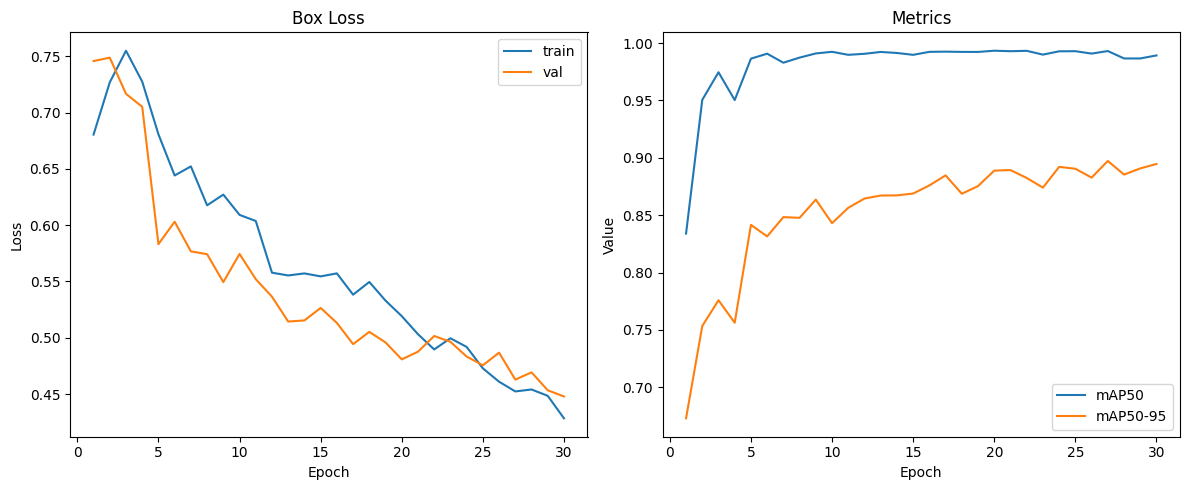

In [4]:
# Read the results.csv file from the latest run
results_file = "./runs/detect/yolov8m_lp_recognition/results.csv"
results_df = pd.read_csv(results_file)

# Create figure with two subplots
plt.figure(figsize=(12, 5))

# Plot training loss
plt.subplot(1, 2, 1)
plt.plot(results_df['epoch'], results_df['train/box_loss'], label='train')
plt.plot(results_df['epoch'], results_df['val/box_loss'], label='val')
plt.title('Box Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plot training metrics
plt.subplot(1, 2, 2)
plt.plot(results_df['epoch'], results_df['metrics/mAP50(B)'], label='mAP50')
plt.plot(results_df['epoch'], results_df['metrics/mAP50-95(B)'], label='mAP50-95')
plt.title('Metrics')
plt.xlabel('Epoch')
plt.ylabel('Value')
plt.legend()

plt.tight_layout()
plt.show()


## **Inference**

WARNING ⚠️ Environment does not support cv2.imshow() or PIL Image.show()
The DISPLAY environment variable isn't set.

image 1/1 /hdd/tu/projects/lp_recognition/vn_license_plates/images/val/Dieu_0017.png: 480x640 1 2-line, 9.0ms
Speed: 2.4ms preprocess, 9.0ms inference, 1.2ms postprocess per image at shape (1, 3, 480, 640)


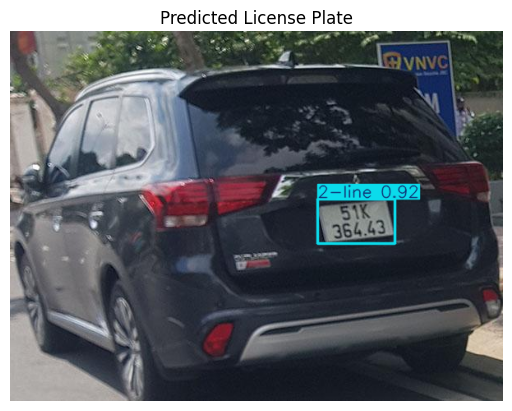

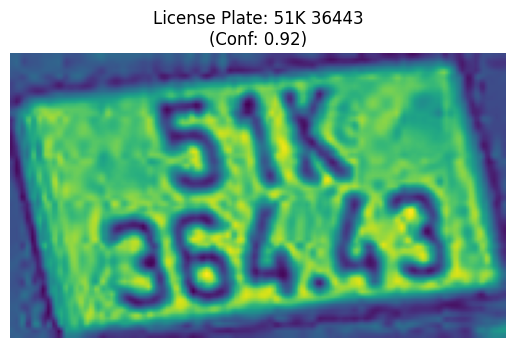

In [9]:
model = YOLO("./runs/detect/yolov8m_lp_recognition/weights/best.pt")

# results = model.predict(source=os.path.join(test_path, test_imgs[10]), show=True, conf=0.5)
# test_img_path = 'images/vehicles.png'
test_img_path = os.path.join(test_path, test_imgs[2])
results = model.predict(source=test_img_path, show=True, conf=0.5)
# save_img = os.path.join("./results", 'vehicles.png')
save_img = os.path.join("./results", test_imgs[2])
results[0].save(save_img)
predicted_img = results[0].plot()
predicted_img = cv2.cvtColor(predicted_img, cv2.COLOR_RGB2BGR)

plt.imshow(predicted_img)
plt.axis('off')
plt.title('Predicted License Plate')
plt.show()

import easyocr

# extract license plates from predicted image
img = cv2.imread(test_img_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
for det in results[0].boxes:
    xmin, ymin, xmax, ymax = det.xyxy[0]
    xmin, ymin, xmax, ymax = int(xmin), int(ymin), int(xmax), int(ymax)
    conf = float(det.conf)
    cls = det.cls

    license_plate = img[ymin:ymax, xmin:xmax]

    # Preprocess license plate image    
    # 1. Grayscale
    gray = cv2.cvtColor(license_plate, cv2.COLOR_BGR2GRAY)

    # 2. Contrast enhancement (CLAHE)
    clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
    license_plate = clahe.apply(gray)

    # 3. Denoise (Bilateral Filter)
    denoised = cv2.bilateralFilter(license_plate, 11, 17, 17)

    # 4. Sharpen
    # kernel = np.array([[0, -1, 0],
    #                 [-1, 5,-1],
    #                 [0, -1, 0]])
    # license_plate = cv2.filter2D(license_plate, -1, kernel)

    # 5. Resize (double size)
    license_plate = cv2.resize(license_plate, None, fx=2, fy=2, interpolation=cv2.INTER_CUBIC)

    # Extract text from license plate using EasyOCR
    reader = easyocr.Reader(['en'])
    text_result = reader.readtext(license_plate)
    
    plate_text = ''
    for detection in text_result:
        plate_text += detection[1] + ' '
    plate_text = plate_text.strip()
    
    plt.imshow(license_plate)
    plt.title(f'License Plate: {plate_text}\n(Conf: {conf:.2f})')
    plt.axis('off')
    plt.show()
plt.show()

